In [22]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [23]:
IMAGE_SIZE = 256
BATCH_SIZE = 20
SHUFFLE = 10000
EPOCHS = 20
CHANNEL = 3

In [25]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "HBV",
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True,
)

Found 337 files belonging to 2 classes.


In [26]:
class_names = df.class_names
class_names

['no', 'yes']

In [27]:
len(df)

17

In [28]:
for image_batch, label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(20, 256, 256, 3)
[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0]


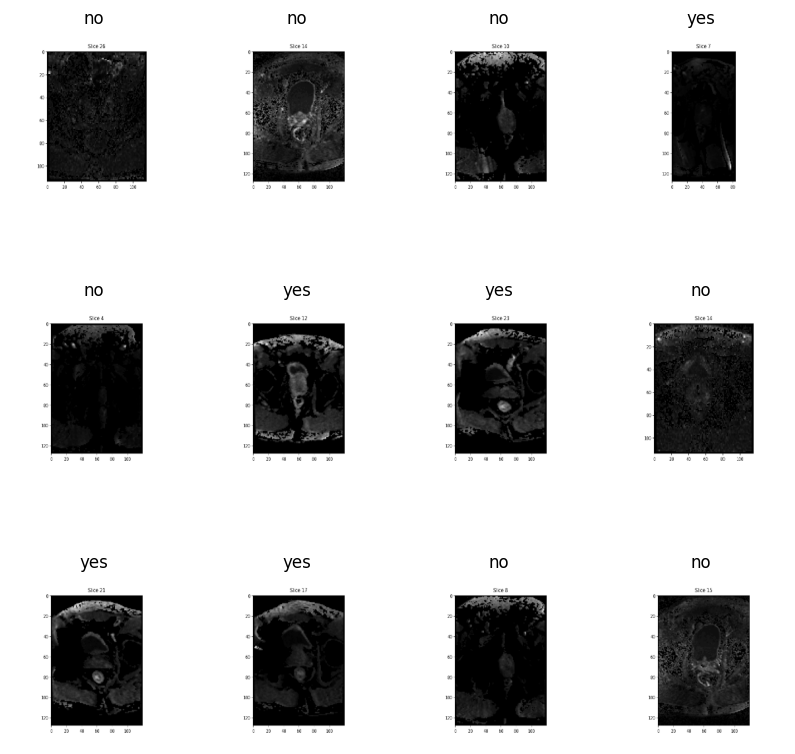

In [29]:
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3,4, i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.axis('off')
    plt.title(class_names[label_batch[i]])

In [30]:
def get_dataset_partitions_tf(df, train_split = 0.8, val_split=0.1, test_split= 0.1, shuffle_size = 10000 ):
    shuffle = SHUFFLE
    df_size = len(df)
    if shuffle:
       df =  df.shuffle(shuffle_size,seed=12)
        
    train_size = int(train_split * df_size)
    val_size = int(val_split * df_size)

    train_df = df.take(train_size)
    val_df = df.skip(train_size).take(val_size)
    test_df = df.skip(train_size).skip(val_size)
    return train_df, val_df, test_df

In [31]:
train_df, val_df, test_df = get_dataset_partitions_tf(df)

In [32]:
len(train_df)

13

In [33]:
len(test_df)

3

In [34]:
len(val_df)

1

In [35]:
## this is used to increase the loading speed of the dataset
train_df = train_df.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_df = val_df.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_df = test_df.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [36]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [37]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)
])

In [38]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNEL)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 ,activation='relu'),
    layers.Dense(n_classes ,activation='softmax'),
])
model.build(input_shape=input_shape)

In [39]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (20, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (20, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (20, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (20, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (20, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (20, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (20, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (20, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (20, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (20, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (20, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (20, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (20, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (20, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (20, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (20, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (20, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile (
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [41]:
history = model.fit(
    train_df,
    epochs= EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_df
)

Epoch 1/20


13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4926 - loss: 0.8731 - val_accuracy: 0.8000 - val_loss: 0.5599
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.6243 - loss: 0.5843 - val_accuracy: 0.8500 - val_loss: 0.5448
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.7114 - loss: 0.5774 - val_accuracy: 0.8500 - val_loss: 0.4460
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7276 - loss: 0.4948 - val_accuracy: 0.8000 - val_loss: 0.4090
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.7820 - loss: 0.5030 - val_accuracy: 0.8500 - val_loss: 0.3248
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.7946 - loss: 0.3966 - val_accuracy: 0.9000 - val_loss: 0.2956
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8403 - loss: 0.3955 - val_accuracy: 0.8500 - val_loss: 0.3515
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8016 - loss: 0.3738 - val_accuracy: 0.7500 - val_loss: 0.4161
Epo

In [49]:
scores = model.evaluate(test_df)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step - accuracy: 0.9146 - loss: 0.2673


In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

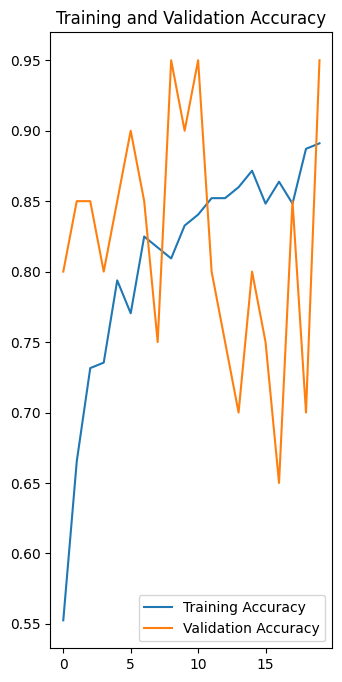

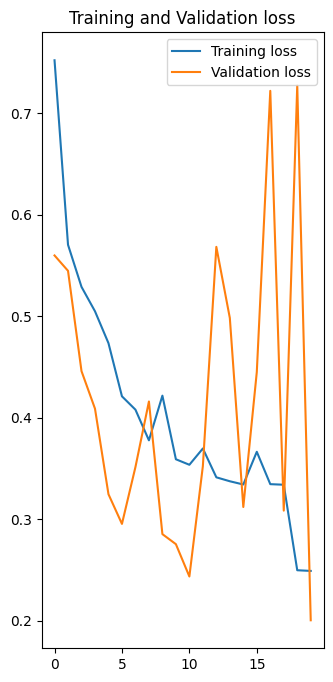

In [51]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss , label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')

first image to predict
first image actual label:  yes


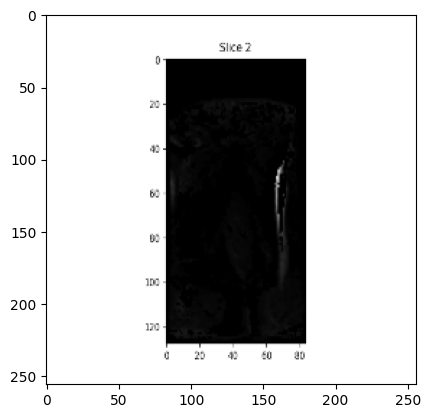

In [53]:
for image_batch, label_batch in test_df.take(1):
    first_image = image_batch[1].numpy().astype('uint8')
    first_label = label_batch[1].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print('first image actual label: ', class_names[first_label])

In [54]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.argmax(predictions[0])), 2)
    return predicted_class, confidence

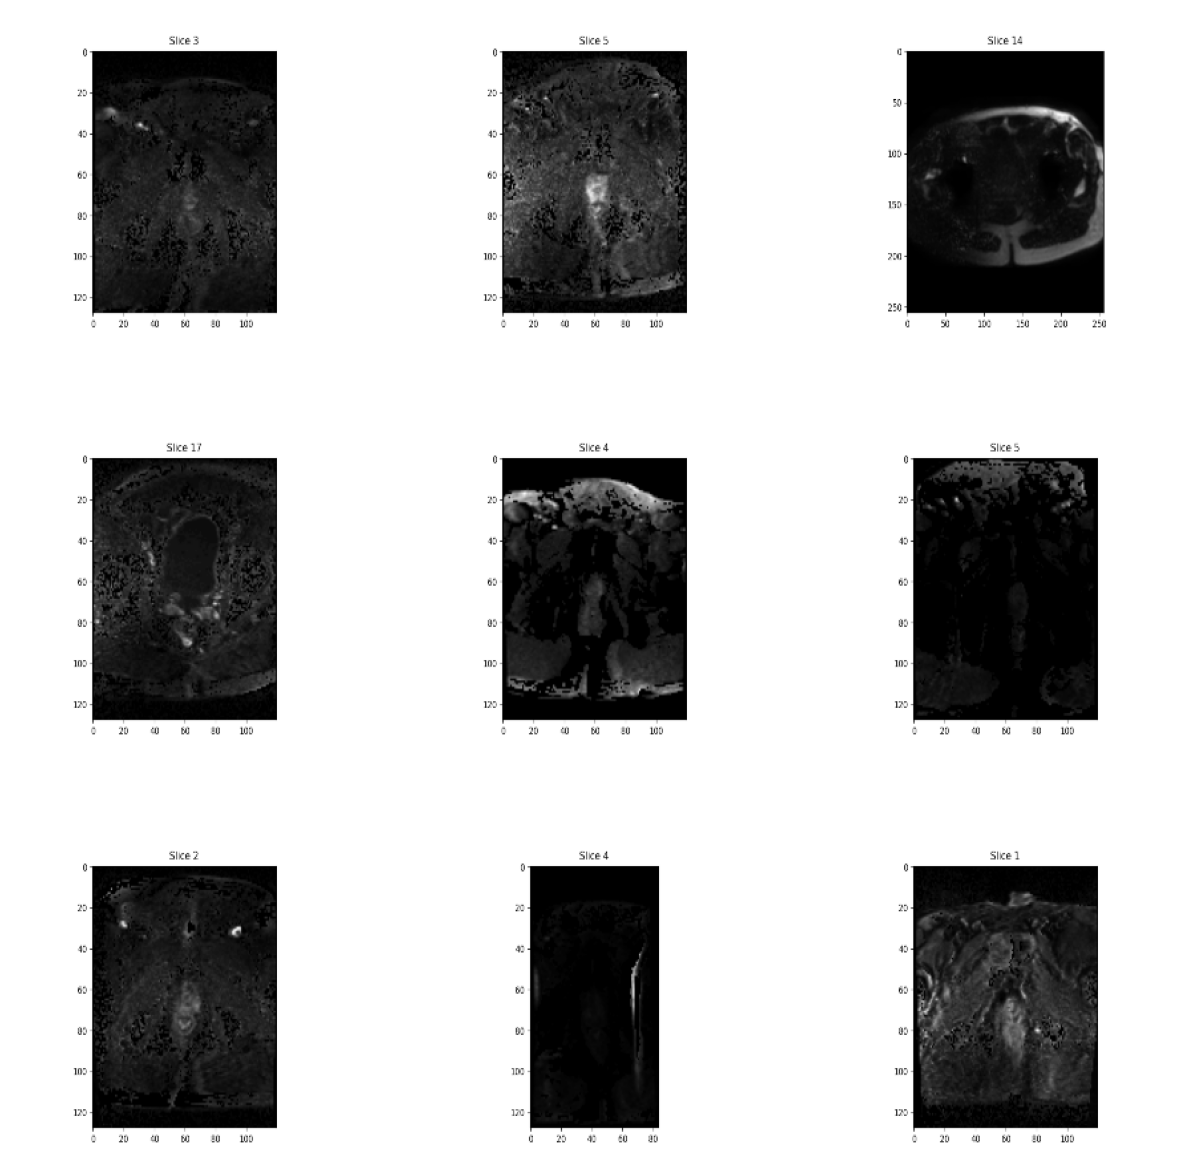

In [55]:
plt.figure(figsize=(15, 15))
for images,labels in test_df.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        actual_class = class_names[labels[i]]
        
        plt.axis('off')

#### The code below is used to save the prediction model on your drive

In [48]:
# model_name = "Cow Disease Detection Model_3"
# model.save(f"../Deep_Learning_Models/{model_name}.keras")